In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def make_meshgrid(x, y, h=0.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

In [3]:
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

## A

In [4]:
#data preprocessing
data_a = pd.read_table('svmdata_a.txt')
test_data_a = pd.read_table('svmdata_a_test.txt')

color_map = {'red': -1, 'green': 1}
data_a['Color'] = data_a['Color'].map(color_map)
test_data_a['Color'] = test_data_a['Color'].map(color_map)

train_X_a = data_a.drop('Color', axis=1)
train_y_a = data_a.Color
test_X_a = test_data_a.drop('Color', axis=1)
test_y_a = test_data_a.Color

In [5]:
#create and train svm model with linear kernel
clf_a = svm.SVC(kernel='linear')
clf_a.fit(train_X_a, train_y_a)

SVC(kernel='linear')

In [6]:
#check accuracy and confusion matrix on train and test
pred_a = clf_a.predict(test_X_a)
pred_tr_a = clf_a.predict(train_X_a)
conf_m_a = confusion_matrix(test_y_a, pred_a)
conf_m_tr_a = confusion_matrix(train_y_a, pred_tr_a)

print('Test accuracy ', accuracy_score(test_y_a, pred_a))
print('Train accuracy ', accuracy_score(train_y_a, pred_tr_a))
print('Test confusion matrix\n', pd.DataFrame(conf_m_a))
print('Train confusion matrix\n', pd.DataFrame(conf_m_tr_a))
print('Number of support vectors', clf_a.n_support_)

Test accuracy  1.0
Train accuracy  1.0
Test confusion matrix
     0   1
0  20   0
1   0  20
Train confusion matrix
     0   1
0  20   0
1   0  20
Number of support vectors [3 3]


In [7]:
x0, x1 = train_X_a.to_numpy()[:, 0], train_X_a.to_numpy()[:, 1]
xx, yy = make_meshgrid(x0, x1)
z = clf_a.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

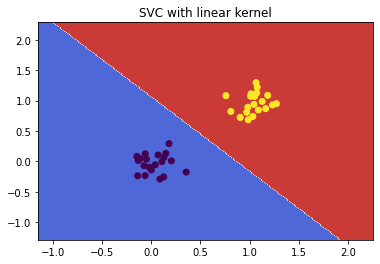

In [8]:
plt.contourf(xx, yy, z, cmap=plt.cm.coolwarm)
plt.scatter(x0, x1, c=train_y_a)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('SVC with linear kernel')
plt.show()

## B

In [9]:
#data preprocessing
data_b = pd.read_table('svmdata_b.txt')
test_data_b = pd.read_table('svmdata_b_test.txt')

color_map = {'red': -1, 'green': 1}
data_b['Colors'] = data_b['Colors'].map(color_map)
test_data_b['Colors'] = test_data_b['Colors'].map(color_map)

train_X_b = data_b.drop('Colors', axis=1)
train_y_b = data_b.Colors
test_X_b = test_data_b.drop('Colors', axis=1)
test_y_b = test_data_b.Colors

In [10]:
tolerance = [2**i for i in range(-6, 10)]
train_acc = []
test_acc = []

for tol in tolerance:
    clf_b = svm.SVC(kernel='linear', C=tol)
    clf_b.fit(train_X_b, train_y_b)
    
    pred_train_b = clf_b.predict(train_X_b)
    pred_test_b = clf_b.predict(test_X_b)
    tr_acc = accuracy_score(train_y_b, pred_train_b)
    t_acc = accuracy_score(test_y_b, pred_test_b)
    
    train_acc.append(tr_acc)
    test_acc.append(t_acc)    

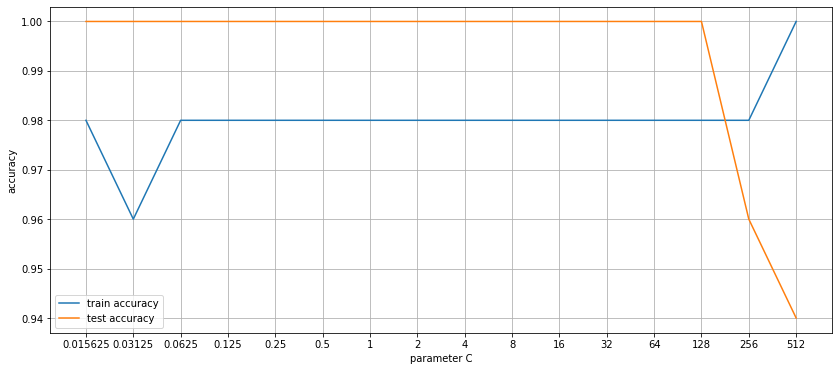

In [11]:
plt.figure(figsize=(14,6))
plt.plot(train_acc, label='train accuracy')
plt.plot(test_acc, label='test accuracy')
plt.xticks(range(len(tolerance)), tolerance)
plt.xlabel('parameter C')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.grid(visible=True)
plt.show()

## C

In [12]:
data_c = pd.read_table('svmdata_c.txt')
test_data_c = pd.read_table('svmdata_c_test.txt')

color_map = {'red': -1, 'green': 1}
data_c['Colors'] = data_c['Colors'].map(color_map)
test_data_c['Colors'] = test_data_c['Colors'].map(color_map)

train_X_c = data_c.drop('Colors', axis=1)
train_y_c = data_c.Colors
test_X_c = test_data_c.drop('Colors', axis=1)
test_y_c = test_data_c.Colors

In [13]:
models = (
    svm.SVC(kernel='linear'),
    svm.SVC(kernel='poly', degree=1),
    svm.SVC(kernel='poly', degree=2),
    svm.SVC(kernel='poly', degree=3),
    svm.SVC(kernel='poly', degree=4),
    svm.SVC(kernel='poly', degree=5),
    svm.SVC(kernel='sigmoid'),
    svm.SVC(kernel='rbf')
)
models = (m.fit(train_X_c, train_y_c) for m in models)

In [14]:
titles = (
    "SVC with linear kernel",
    "SVC with polynomial (degree 1) kernel",
    "SVC with polynomial (degree 2) kernel",
    "SVC with polynomial (degree 3) kernel",
    "SVC with polynomial (degree 4) kernel",
    "SVC with polynomial (degree 5) kernel",
    "SVC with sigmoid kernel",
    "SVC with RBF kernel",
)

In [15]:
x0, x1 = train_X_c.to_numpy()[:, 0], train_X_c.to_numpy()[:, 1]
xx, yy = make_meshgrid(x0, x1)

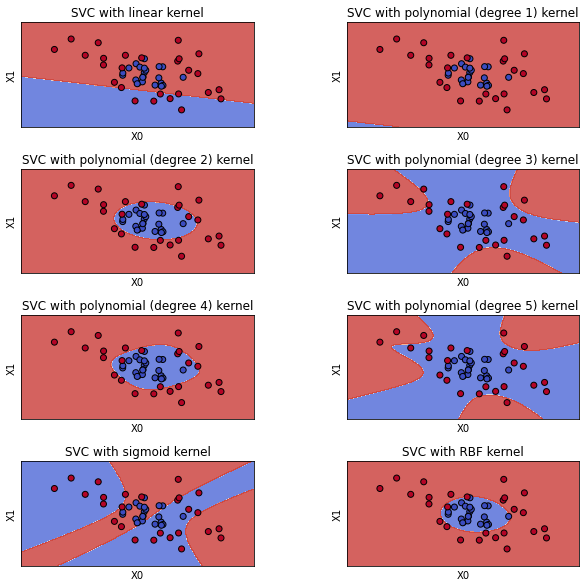

In [16]:
fig, sub = plt.subplots(4, 2, figsize=(10,10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(x0, x1, c=train_y_c, cmap=plt.cm.coolwarm, edgecolors="k")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel("X0")
    ax.set_ylabel("X1")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

## D

In [17]:
data_d = pd.read_table('svmdata_d.txt')
test_data_d = pd.read_table('svmdata_d_test.txt')

color_map = {'red': -1, 'green': 1}
data_d['Colors'] = data_d['Colors'].map(color_map)
test_data_d['Colors'] = test_data_d['Colors'].map(color_map)

train_X_d = data_d.drop('Colors', axis=1)
train_y_d = data_d.Colors
test_X_d = test_data_d.drop('Colors', axis=1)
test_y_d = test_data_d.Colors

In [18]:
models_d = (
    svm.SVC(kernel='linear'),
    svm.SVC(kernel='poly', degree=1),
    svm.SVC(kernel='poly', degree=2),
    svm.SVC(kernel='poly', degree=3),
    svm.SVC(kernel='poly', degree=4),
    svm.SVC(kernel='poly', degree=5),
    svm.SVC(kernel='sigmoid'),
    svm.SVC(kernel='rbf')
)
models_d = (m.fit(train_X_d, train_y_d) for m in models_d)

In [19]:
titles = (
    "SVC with linear kernel",
    "SVC with polynomial (degree 1) kernel",
    "SVC with polynomial (degree 2) kernel",
    "SVC with polynomial (degree 3) kernel",
    "SVC with polynomial (degree 4) kernel",
    "SVC with polynomial (degree 5) kernel",
    "SVC with sigmoid kernel",
    "SVC with RBF kernel",
)

In [20]:
x0, x1 = train_X_d.to_numpy()[:, 0], train_X_d.to_numpy()[:, 1]
xx, yy = make_meshgrid(x0, x1)

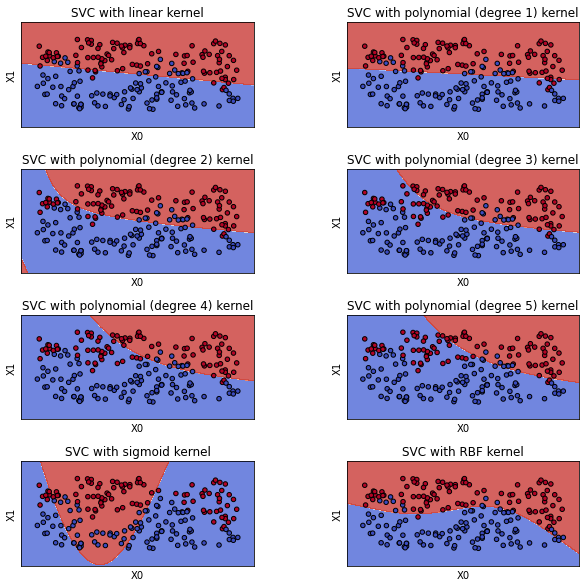

In [21]:
fig, sub = plt.subplots(4, 2, figsize=(10,10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for clf, title, ax in zip(models_d, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(x0, x1, c=train_y_d, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel("X0")
    ax.set_ylabel("X1")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

## E

In [22]:
data_e = pd.read_table('svmdata_e.txt')
test_data_e = pd.read_table('svmdata_e_test.txt')

color_map = {'red': -1, 'green': 1}
data_e['Colors'] = data_e['Colors'].map(color_map)
test_data_e['Colors'] = test_data_e['Colors'].map(color_map)

train_X_e = data_e.drop('Colors', axis=1)
train_y_e = data_e.Colors
test_X_e = test_data_e.drop('Colors', axis=1)
test_y_e = test_data_e.Colors

In [23]:
x0, x1 = train_X_e.to_numpy()[:, 0], train_X_e.to_numpy()[:, 1]
xx, yy = make_meshgrid(x0, x1)

In [24]:
titles = (
    "SVC with linear kernel",
    "SVC with polynomial (degree 1) kernel",
    "SVC with polynomial (degree 2) kernel",
    "SVC with polynomial (degree 3) kernel",
    "SVC with polynomial (degree 4) kernel",
    "SVC with polynomial (degree 5) kernel",
    "SVC with sigmoid kernel",
    "SVC with RBF kernel",
)

gamma  0.1
gamma  1
gamma  10
gamma  50
gamma  150


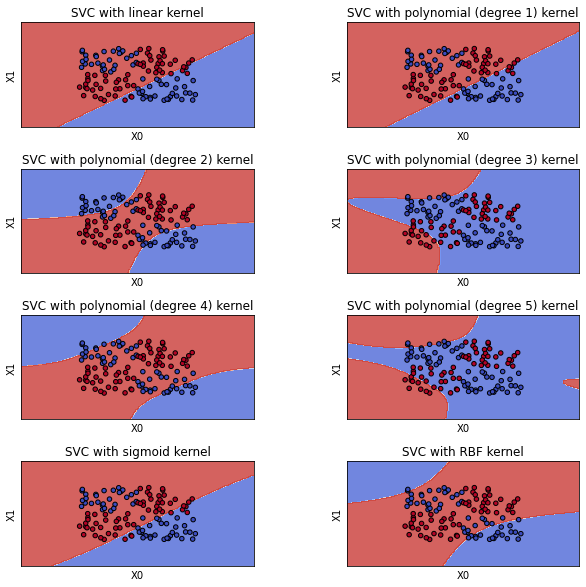

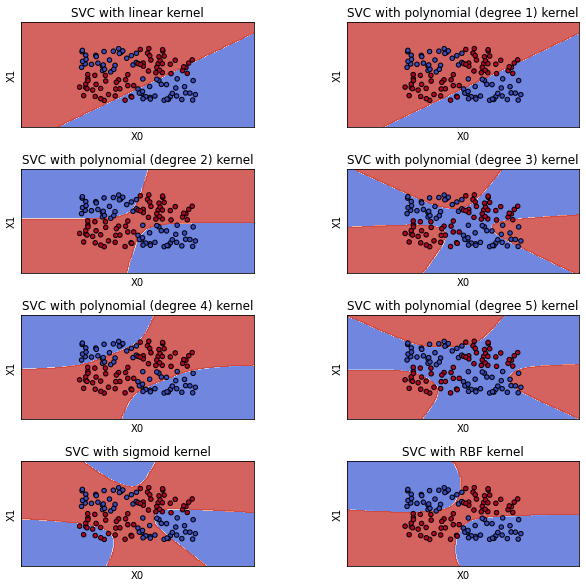

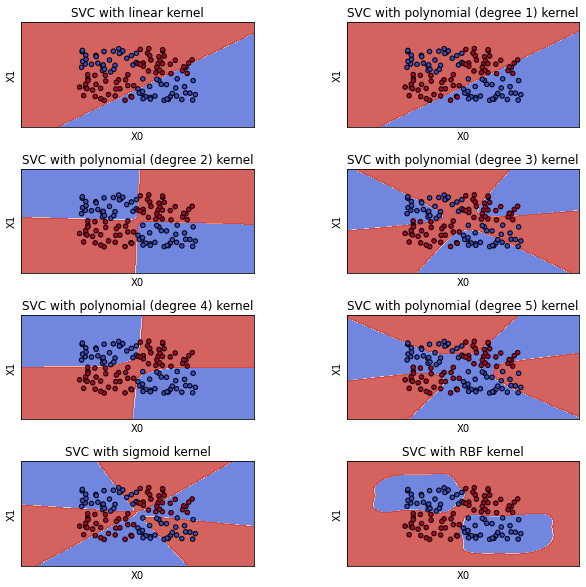

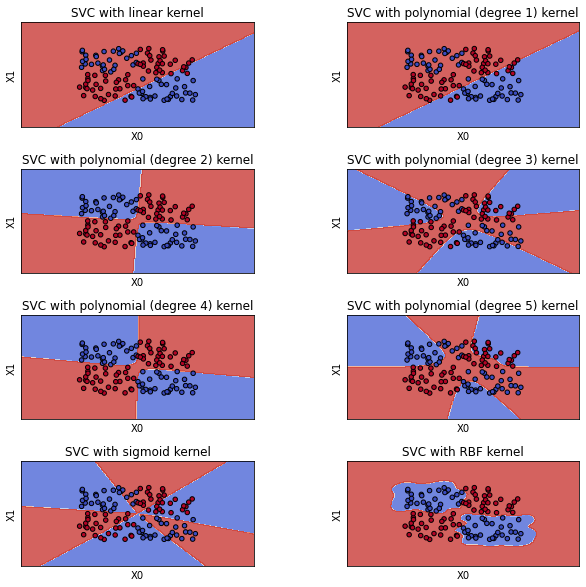

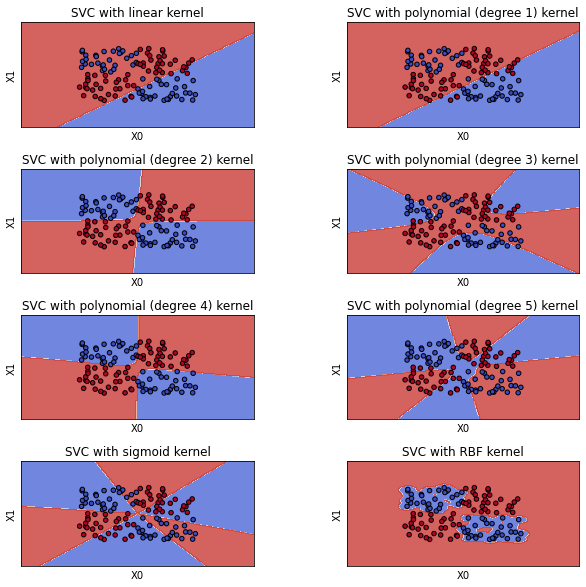

In [27]:
gammas = [0.1, 1, 10, 50, 150]

for gamma in gammas:
    print('gamma ', gamma)
    
    models_e = (
        svm.SVC(kernel='linear', gamma=gamma),
        svm.SVC(kernel='poly', degree=1, gamma=gamma),
        svm.SVC(kernel='poly', degree=2, gamma=gamma),
        svm.SVC(kernel='poly', degree=3, gamma=gamma),
        svm.SVC(kernel='poly', degree=4, gamma=gamma),
        svm.SVC(kernel='poly', degree=5, gamma=gamma),
        svm.SVC(kernel='sigmoid', gamma=gamma),
        svm.SVC(kernel='rbf', gamma=gamma)
    )
    models_e = (m.fit(train_X_e, train_y_e) for m in models_e)
    
    fig, sub = plt.subplots(4, 2, figsize=(10,10))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    for clf, title, ax in zip(models_e, titles, sub.flatten()):
        plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(x0, x1, c=train_y_e, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel("X0")
        ax.set_ylabel("X1")
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)
        
plt.show()